In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("./test_images/Cristiano Ronaldo Just Reached a Major.jpg")
img.shape

(1024, 634, 3)

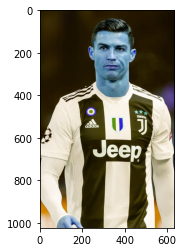

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape

(1024, 634, 3)

In [5]:
gray

array([[ 19,  21,  22, ...,  11,  12,  12],
       [ 21,  22,  22, ...,  11,  12,  12],
       [ 22,  22,  22, ...,  11,  12,  12],
       ...,
       [222, 221, 221, ..., 234, 238, 237],
       [221, 220, 219, ..., 234, 237, 235],
       [218, 217, 217, ..., 235, 235, 233]], dtype=uint8)

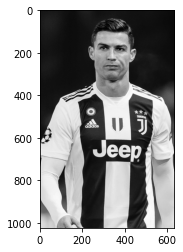

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[225,  94, 227, 227]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(225, 94, 227, 227)

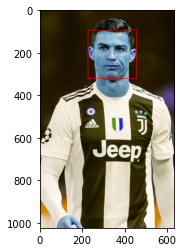

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

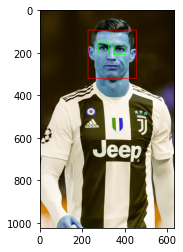

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    face_cascade.load('haarcascade_frontalface_default.xml')
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap= 'gray')
plt.show()

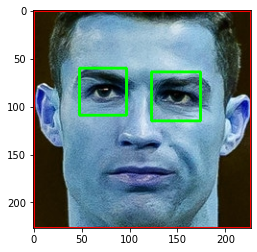

In [11]:
%matplotlib inline 
plt.imshow(roi_color, cmap = 'gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

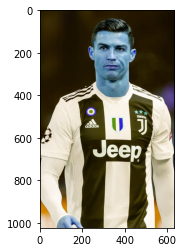

In [13]:
original_image = cv2.imread('./test_images/Cristiano Ronaldo Just Reached a Major.jpg')
plt.imshow(original_image)

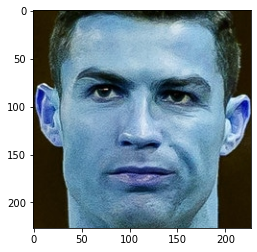

In [14]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Cristiano Ronaldo Just Reached a Major.jpg')
plt.imshow(cropped_image)

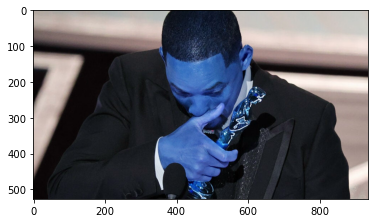

In [15]:
org_image_obstructed = cv2.imread('./test_images/2022 Release and Awards Campaign.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test/2022 Release and Awards Campaign.jpg')
cropped_image_no_2_eyes

In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [18]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/Christiano Ronaldo',
 './dataset/cropped',
 './dataset/Priyanka Chopra',
 './dataset/Sachin Tendulkar',
 './dataset/Shahrukh khan',
 './dataset/Will Smith']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Christiano Ronaldo
Generating cropped images in folder:  ./dataset/cropped/Christiano Ronaldo
cropped
Priyanka Chopra
Generating cropped images in folder:  ./dataset/cropped/Priyanka Chopra
Sachin Tendulkar
Generating cropped images in folder:  ./dataset/cropped/Sachin Tendulkar
Shahrukh khan
Generating cropped images in folder:  ./dataset/cropped/Shahrukh khan
Will Smith
Generating cropped images in folder:  ./dataset/cropped/Will Smith


In [22]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversion
    #convert to graysccale
    imArray = cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    
    #process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

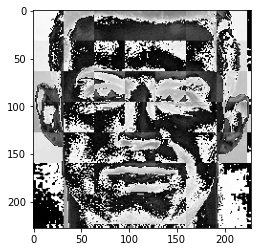

In [23]:
im_har = w2d(cropped_image, 'db1' ,5)
plt.imshow(im_har, cmap='gray')

In [24]:
celebrity_file_names_dict

{'Christiano Ronaldo': ['./dataset/cropped/Christiano Ronaldo/Christiano Ronaldo1.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo2.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo3.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo4.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo5.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo6.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo7.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo8.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo9.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo10.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo11.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo12.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo13.png',
  './dataset/cropped/Christiano Ronaldo/Christiano Ronaldo14.png',
  './dataset/cropped/Christiano Ronaldo/Christian

In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Christiano Ronaldo': 0,
 'cropped': 1,
 'Priyanka Chopra': 2,
 'Sachin Tendulkar': 3,
 'Shahrukh khan': 4,
 'Will Smith': 5}

In [52]:
x,y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har  = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [53]:
len(x[0])

3072

In [54]:
x = np.array(x).reshape(len(x), 3072).astype(float)
x.shape

(248, 3072)

In [55]:
x[0]

array([ 32.,  31.,  41., ..., 227., 231., 225.])

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8064516129032258

In [58]:
len(x_test)

62

In [59]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           2       1.00      1.00      1.00        15
           3       0.57      0.40      0.47        10
           4       0.55      0.85      0.67        13
           5       1.00      0.86      0.92        14

    accuracy                           0.81        62
   macro avg       0.82      0.78      0.79        62
weighted avg       0.84      0.81      0.81        62



In [60]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [61]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [62]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.773684,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.575391,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.843528,{'logisticregression__C': 1}


In [63]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [64]:
best_estimators['svm'].score(x_test, y_test)

0.7580645161290323

In [65]:
best_estimators['random_forest'].score(x_test, y_test)

0.5161290322580645

In [66]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.8064516129032258

In [67]:
best_clf = best_estimators['svm']

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix (y_test, best_clf.predict(x_test))
cm

array([[ 7,  0,  2,  1,  0],
       [ 0, 14,  0,  1,  0],
       [ 0,  2,  4,  4,  0],
       [ 1,  1,  1, 10,  0],
       [ 0,  0,  0,  2, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

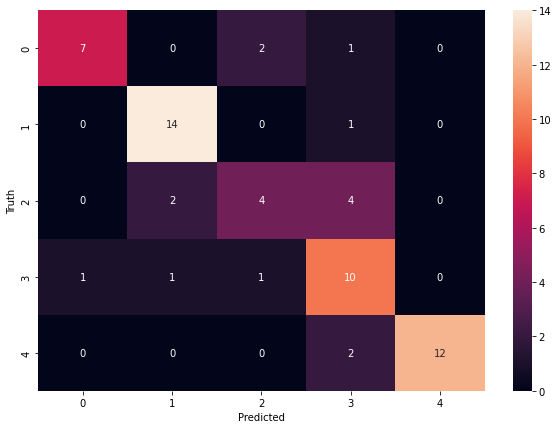

In [69]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
class_dict

{'Christiano Ronaldo': 0,
 'cropped': 1,
 'Priyanka Chopra': 2,
 'Sachin Tendulkar': 3,
 'Shahrukh khan': 4,
 'Will Smith': 5}

In [71]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [72]:
import json
with open("class_dcitionary.json", "w") as f:
    f.write(json.dumps(class_dict))